# Introduction

For this project, I was interested in exploring insights from a [Video Game Sales found on Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales)  from vgchartz.com using the CRISP-DM Process of:

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

To better understand about game industry, in this post I would like to answer following questions:
- Which years having most /least video game released?
- Which genre is the most common?
- Which region spends most money for video game?
- See what happended over year? Are they just popular for some years?
- What happended with sale via gerne over time?

# Data quality checking

## Library

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("vgsales.csv")

In [7]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


There are 16598 records in the dataset. Fields include
- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.


In [8]:
# infor and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


We can see that there are some missing values in `Year` and `Publisher` fields. To deal with these missing values, for simplicity, I will drop all of them.

In [13]:
df.dropna(subset=['Year', 'Publisher'], inplace=True)

Let dive deeper in `Year` column

In [15]:
df['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

We can see that there are just some value from two year 2017, 2020. For simplicity, we just focus on year before 2017 (1984-2016)

In [16]:
df = df[df['Year'] < 2017]

In [17]:
sum(df.duplicated())

0

There is no dupilicated data in this dataset.

In [18]:
# convert year datatype into int
df['Year'] = df['Year'].astype('int')

/var/folders/4g/gnmb0dcd19l4hknq0h9wlj5r0000gn/T/ipykernel_4040/4200965123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype('int')


# Exploratory Data Analysis: Analyse and Visualise


## Which years having most /least video game released?

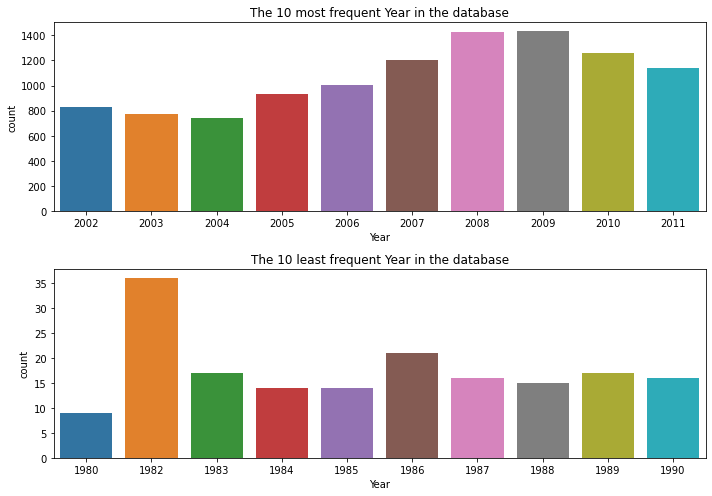

In [50]:
field = "Year"
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
sns.countplot(df[field], order=sorted(df[field].value_counts().index[:10]), ax=ax1)
ax1.set_title(f"The 10 most frequent {field} in the database")

sns.countplot(df[field], order=sorted(df[field].value_counts().index[-10:]), ax=ax2)
ax2.set_title(f"The 10 least frequent {field} in the database")
plt.tight_layout()
plt.savefig("fig/question1.png", dpi=200)

2008, 2009 are best selling years. What happened? 2008 is the worst year for economic, but for video game, it goes revert.

## Which genre is the most common?

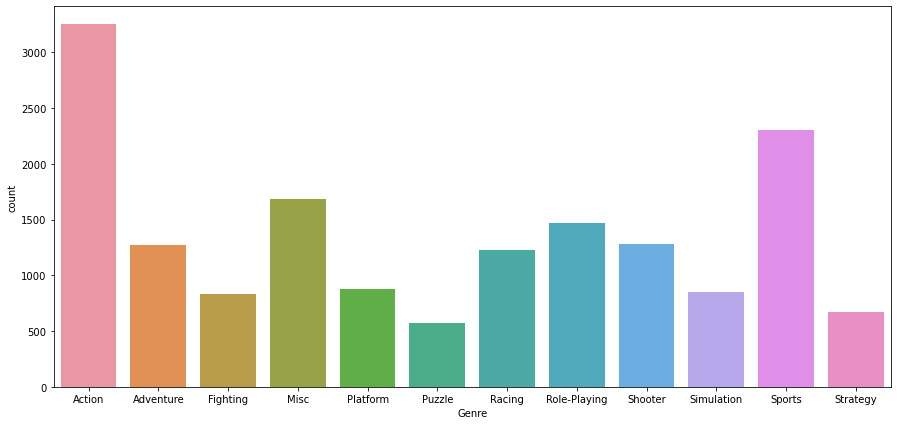

In [51]:
field = "Genre"
plt.figure(figsize=(15,7))
sns.countplot(df[field], order=sorted(df[field].value_counts().index))
plt.savefig("fig/question2.png", dpi=200)
plt.show()

Action is the genre having most quantity game in this dataset.  the action genre's popularity in video games can be attributed to its adrenaline-pumping gameplay, immersive experiences, wide variety of sub-genres, social interactions, technological advancements, and mainstream appeal. These factors combine to make action games one of the most sought-after genres in the video game industry.

## Which platform is the most common?

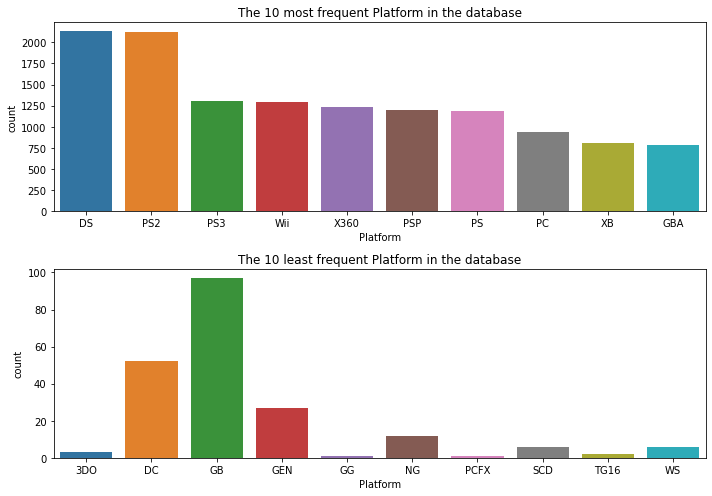

In [52]:
field = "Platform"
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
sns.countplot(df[field], order=df[field].value_counts().index[:10], ax=ax1)
ax1.set_title(f"The 10 most frequent {field} in the database")

sns.countplot(df[field], order=sorted(df[field].value_counts().index[-10:]), ax=ax2)
ax2.set_title(f"The 10 least frequent {field} in the database")
plt.tight_layout()
plt.savefig("fig/question3.png", dpi=200)

There are several reasons why DS (Nintendo DS) is a popular platform for video games:

1. Unique hardware features: DS has unique hardware features like two screens, a touch screen, and a microphone. These features allow developers to create innovative gameplay mechanics that are not possible on other platforms.

2. Wide range of games: DS has a wide range of games across different genres, from puzzle games to role-playing games. This variety attracts gamers of different ages and interests.

3. Portability: DS is a portable gaming console that allows gamers to play games anywhere, anytime. This makes it convenient for gamers who travel frequently or want to play games on the go.

4. Affordability: DS is an affordable gaming platform compared to other consoles, making it accessible to a wider range of consumers.

5. Nostalgia factor: DS was released in 2004 and became popular during the mid-2000s, making it a nostalgic platform for many gamers who grew up during that time. 

Overall, DS's unique hardware features, wide range of games, portability, affordability, and nostalgia factor have contributed to its popularity as a platform for video games.

Beside, we have PS2. It was a very popular console when it was released in 2000. Here are some reasons why PS2 became a common platform for video games:

1. Huge game library: PS2 has one of the largest game libraries of any console, with over 3,800 games released for it. This huge selection of games across all genres made it a popular platform for gamers of all ages and interests.

2. Powerful hardware: At the time of its release, PS2 had powerful hardware that allowed developers to create more advanced and immersive games than were possible on previous consoles.

3. DVD player: PS2 was also one of the first consoles to include a built-in DVD player, making it a popular choice for people who wanted both a gaming console and a DVD player in one device.

4. Brand recognition: The PlayStation brand was already well-established from the success of the original PlayStation console, which helped to make PS2 a popular choice among gamers.

5. Affordability: PS2 was also an affordable console, which made it accessible to a wider range of consumers.

Overall, the combination of a huge game library, powerful hardware, built-in DVD player, brand recognition, and affordability made PS2 a common platform for video games and a popular console among gamers.

Conclusion, if you want something portable, choose DS, otherwise choose PS2 since there are huge game library.

## Which region spends most money for video game?

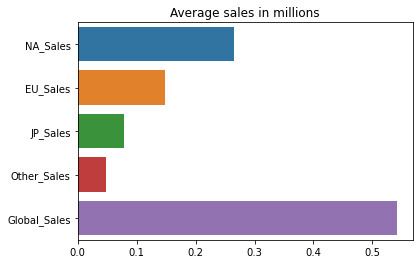

In [53]:
avg_sale_df = df[[f for f in df.columns if 'Sales' in f]].mean().to_frame()
sns.barplot(y=avg_sale_df.index, x=avg_sale_df[0].values, orient='h')
plt.title("Average sales in millions")
plt.savefig("fig/question4a.png", dpi=200)
plt.show()


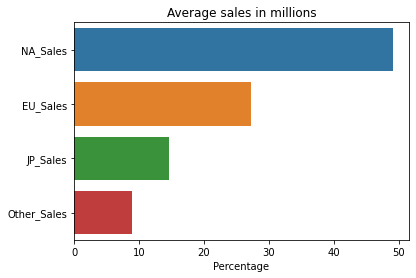

In [54]:
# in percentage
avg_sale_df = df[[f for f in df.columns if 'Sales' in f and 'Global_Sales' not in f]].mean().to_frame()
avg_sale_df = avg_sale_df/avg_sale_df.sum()*100
sns.barplot(y=avg_sale_df.index, x=avg_sale_df[0].values, orient='h')
plt.xlabel("Percentage")
plt.title("Average sales in millions")
plt.savefig("fig/question4b.png", dpi=200)
plt.show()

Undoutbly, North America has the largest sales in the video game industry (nearly 50% of global sale). 

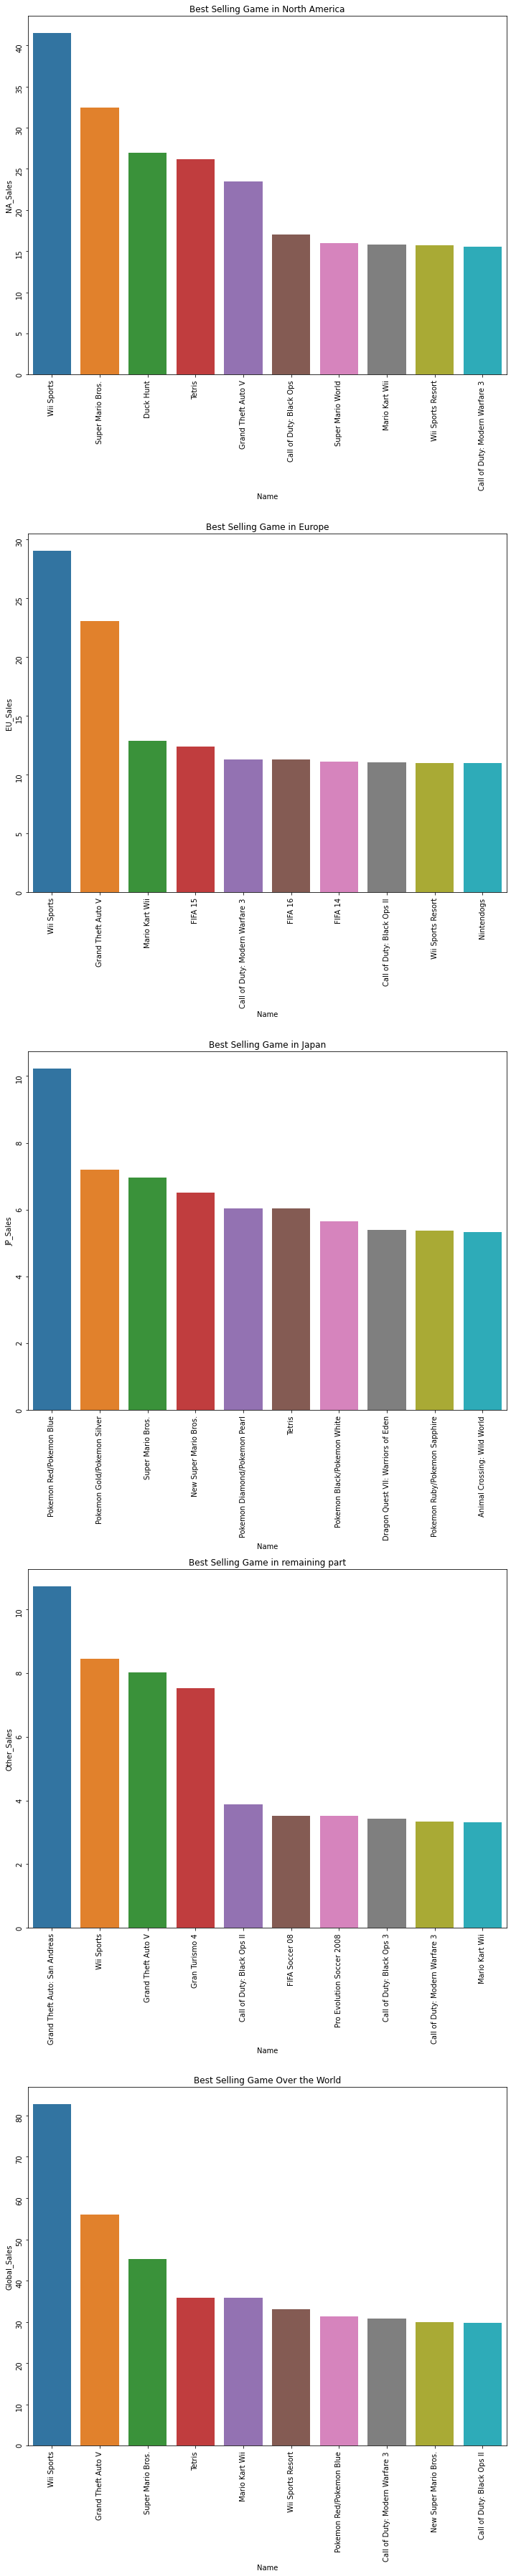

In [55]:
fig, axs = plt.subplots(5, 1, figsize=(10, 50))
axs = np.ravel(axs)
titles = [
    "Best Selling Game in North America",
    "Best Selling Game in Europe",
    "Best Selling Game in Japan",
    "Best Selling Game in remaining part",
    "Best Selling Game Over the World",
]
for ind, col in enumerate(['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']):
    best_selling_game = df.groupby('Name')[col].sum().to_frame()
    best_selling_game.sort_values(by=col, ascending=False, inplace=True)
    best_selling_game.reset_index(inplace=True)
    best_selling_game = best_selling_game.iloc[:10, :]
    axs[ind].set_title(titles[ind])
    axs[ind].tick_params(labelrotation=90)
    sns.barplot(x='Name', y=col, data=best_selling_game, ax=axs[ind])
plt.tight_layout()
plt.savefig("fig/question4c.png", dpi=200)
plt.show()

One observation, the best-selling game in Japan (`Pokemon Red/ Pokemon Blue`) is different from another region (`Wii Sports`).

## See what happended over year? Are they just popular for some years?

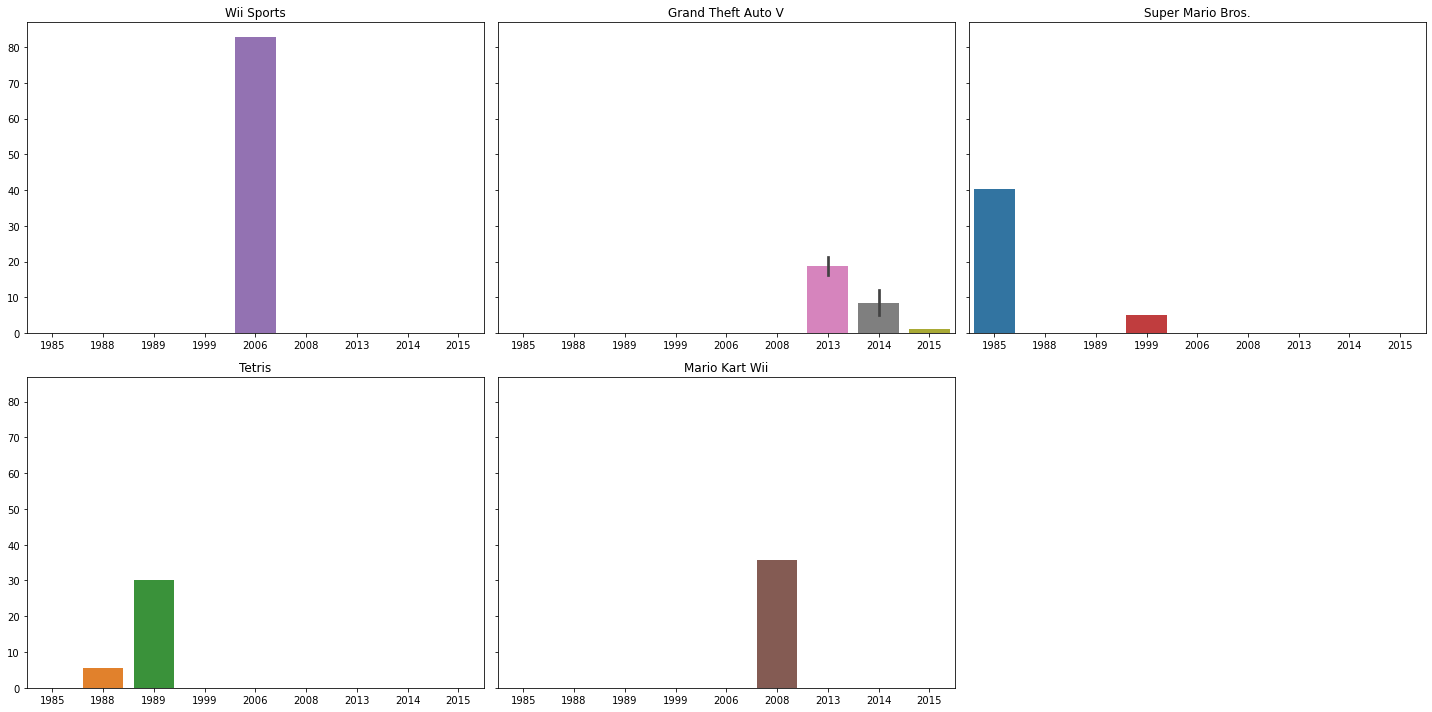

In [56]:
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(20, 10))
axs = np.ravel(axs)
for ind, name in enumerate(['Wii Sports', 'Grand Theft Auto V', 'Super Mario Bros.', 'Tetris',
       'Mario Kart Wii']):
    mask = df['Name'] == name
    temp_df = df[mask]
    temp_df = temp_df[['Year', 'Global_Sales']]
    temp1_df = pd.DataFrame()
    temp1_df['Year'] = [f for f in [2006, 1985, 2008, 1989, 2013, 2014, 1988, 1999, 2015] if f not in temp_df.Year.values]
    temp1_df['Global_Sales'] = 0
    temp_df = pd.concat((temp_df, temp1_df), axis=0)
    sns.barplot(x='Year', y='Global_Sales', data=temp_df, ax=axs[ind])
    axs[ind].set_title(name)
    axs[ind].set_xlabel("")
    axs[ind].set_ylabel("")
    # axs[ind].tick_params(labelrotation=90)
axs[5].set_axis_off()
    # axs[ind].set_xlim(xmin=1980, xmax=2017)
plt.tight_layout()
plt.savefig("fig/question5.png", dpi=200)
plt.show()

As we can see, for example `Wii Sports` game is just in the dataset for one year, but 80 million in sales. All of the game players bought the game in its release year, do they?

## What happended with sale via gerne over time?

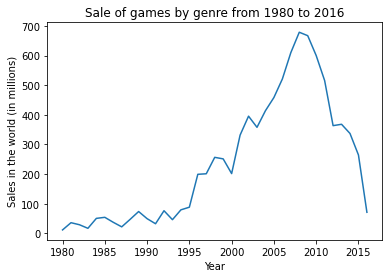

In [57]:
year_sales = df.groupby(['Year'])['Global_Sales'].sum().reset_index()
sns.lineplot(x='Year', y='Global_Sales', data=year_sales)
plt.ylabel("Sales in the world (in millions)")
plt.title("Sale of games by genre from 1980 to 2016")
plt.savefig("fig/question6a.png", dpi=200)
plt.show()

In [46]:
year_sales.sort_values(by='Global_Sales', ascending=False)

,Year,Global_Sales
28,2008,678.90
29,2009,667.30
27,2007,609.92
30,2010,600.29
26,2006,521.04
31,2011,515.80
25,2005,458.51
24,2004,414.01
22,2002,395.52
33,2013,368.11


- Video game industry grow dramatically in the period (1980-2009), just for 30 years, from 11.38 M in 1980 to 678 M in 2009, about 61 times.
- The period 2009-2017, dropped so quickly, from 678 M in 2009, and in 2016, it just reached 70.9M. What is the reason behind this?

In [59]:
genre_global_sales_df = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
mask = genre_global_sales_df['Genre'].isin(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform'])
genre_global_sales_df[mask]

,Year,Genre,Global_Sales
0,1980,Action,0.34
3,1980,Shooter,7.07
4,1980,Sports,0.49
5,1981,Action,14.84
6,1981,Platform,6.93
...,...,...,...
375,2016,Action,19.90
379,2016,Platform,2.07
381,2016,Role-Playing,6.76
382,2016,Shooter,18.22


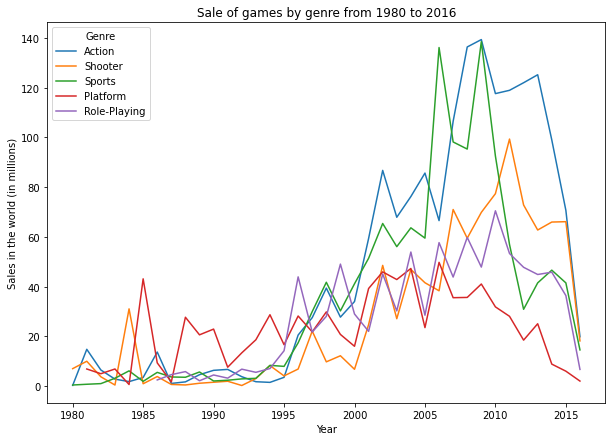

In [60]:
# break down by genre

plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='Global_Sales', data=genre_global_sales_df[mask], ci=None, hue='Genre', )
plt.ylabel("Sales in the world (in millions)")
plt.title("Sale of games by genre from 1980 to 2016")
plt.savefig("fig/question6b.png", dpi=200)
plt.show()

# Conclusion

- 2009 is the peak of released video games.
- Action is the most common genre in video games.
- DS along with PS2 are the most common platforms in video games (both released in the 2000s)
- North America is the best-selling video game region.
- Hot video games have changed over the years, most video games are at the top just for one year.
- Video game industry revenue in sales grow 60 times from 1980 to 2009, then drop dramatically from 2009-2016